In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import library yang dibutuhkan
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

import torch
import datetime
import torch.nn as nn
from tqdm import tqdm
from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import DataLoader, Dataset
from transformers import BertModel, BertTokenizer

In [ ]:
# Menentukan jalur untuk kumpulan data di Google Drive
train_path = "/content/drive/MyDrive/archive/test.csv"
test_path = "/content/drive/MyDrive/archive/train.csv"

# Load data train dan test
train_data = pd.read_csv(train_path, encoding='ISO-8859-1')
test_data = pd.read_csv(test_path, encoding='ISO-8859-1')

# Menampilkan beberapa baris pertama untuk memeriksa strukturnya
print("First few rows of the training data:")
print(train_data.head())

print("\nFirst few rows of the test data:")
print(test_data.head())

# Menampilkan kolom setiap kumpulan data untuk memeriksa strukturnya
print("\nColumns in the training data:", train_data.columns)
print("Columns in the test data:", test_data.columns)

# Memeriksa nilai unik di kolom sentimen
print("\nUnique values in the training sentiment column:", train_data['sentiment'].unique())
print("Unique values in the test sentiment column:", test_data['sentiment'].unique())

# Menangani missing values
train_data['sentiment'].fillna(" ", inplace=True)
train_data['text'].fillna(" ", inplace=True)

test_data['sentiment'].fillna(" ", inplace=True)
test_data['text'].fillna(" ", inplace=True)

# Menghapus baris dengan nilai sentimen yang tidak valid
valid_sentiments = ['positive', 'negative', 'neutral']
train_data = train_data[train_data['sentiment'].isin(valid_sentiments)]
test_data = test_data[test_data['sentiment'].isin(valid_sentiments)]

# Encode labels
le = LabelEncoder()
train_data['labels'] = le.fit_transform(train_data['sentiment'])
test_data['labels'] = le.transform(test_data['sentiment'])

# Menghapus kolom yang tidak diperlukan
train_data = train_data[['text', 'labels']]
test_data = test_data[['text', 'labels']]

# Cetak beberapa baris pertama untuk memeriksa struktur setelah prapemrosesan
print("Preprocessed training data:")
print(train_data.head())

print("Preprocessed test data:")
print(test_data.head())

# One-hot encode labels
one_hot = OneHotEncoder()
train_data_labels = one_hot.fit_transform(train_data[['labels']].values.reshape(-1, 1)).toarray()
test_data_labels = one_hot.transform(test_data[['labels']].values.reshape(-1, 1)).toarray()

train_data = train_data.drop(columns=['labels'])
test_data = test_data.drop(columns=['labels'])

# Menambahkan one-hot encoded labels untuk data train dan test
train_data['labels'] = train_data_labels.tolist()
test_data['labels'] = test_data_labels.tolist()

# Mencetak beberapa baris pertama data pelatihan untuk memeriksa struktur setelah pengkodean
print("Training data sample after one-hot encoding:")
print(train_data.head())

print("Test data sample after one-hot encoding:")
print(test_data.head())


First few rows of the training data:
       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²) 

<ipython-input-3-be039a39efd5>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['labels'] = le.fit_transform(train_data['sentiment'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

=== Running on GPU ===


Epoch 1/10: 100%|██████████| 111/111 [02:24<00:00,  1.31s/it, loss=0.677]


Epoch: 1, Loss: 0.7317


Epoch 2/10: 100%|██████████| 111/111 [02:27<00:00,  1.33s/it, loss=0.663]


Epoch: 2, Loss: 0.6521


Epoch 3/10: 100%|██████████| 111/111 [02:27<00:00,  1.33s/it, loss=0.575]


Epoch: 3, Loss: 0.6316


Epoch 4/10: 100%|██████████| 111/111 [02:27<00:00,  1.33s/it, loss=0.638]


Epoch: 4, Loss: 0.6213


Epoch 5/10: 100%|██████████| 111/111 [02:27<00:00,  1.33s/it, loss=0.613]


Epoch: 5, Loss: 0.6126


Epoch 6/10: 100%|██████████| 111/111 [02:27<00:00,  1.33s/it, loss=0.614]


Epoch: 6, Loss: 0.6048


Epoch 7/10: 100%|██████████| 111/111 [02:27<00:00,  1.33s/it, loss=0.594]


Epoch: 7, Loss: 0.6012


Epoch 8/10: 100%|██████████| 111/111 [02:27<00:00,  1.33s/it, loss=0.65]


Epoch: 8, Loss: 0.6007


Epoch 9/10: 100%|██████████| 111/111 [02:27<00:00,  1.33s/it, loss=0.591]


Epoch: 9, Loss: 0.5965


Epoch 10/10: 100%|██████████| 111/111 [02:27<00:00,  1.33s/it, loss=0.567]


Epoch: 10, Loss: 0.5941


Test: 100%|██████████| 859/859 [06:51<00:00,  2.09it/s, loss=0.669]


Model saved


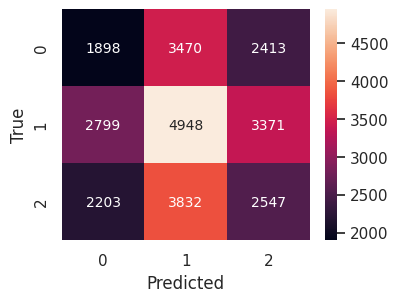

              precision    recall  f1-score   support

    negative       0.28      0.24      0.26      7781
     neutral       0.40      0.45      0.42     11118
    positive       0.31      0.30      0.30      8582

    accuracy                           0.34     27481
   macro avg       0.33      0.33      0.33     27481
weighted avg       0.34      0.34      0.34     27481



In [ ]:
# Menentukan kelas TextDataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float)
        }

# Menentukan kelas CustomBERTClassifier
class CustomBERTClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CustomBERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_ids, attention_mask):
        bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = bert_outputs["last_hidden_state"][:, 0, :]
        x = self.fc1(cls_output)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# inisialisai model dan tokenizer
model = CustomBERTClassifier(num_classes=3)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Mengecheck GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device.type != "cuda":
    print("=== GPU not found, running on CPU ===")
else:
    print("=== Running on GPU ===")

# Membuat datasets dan dataloaders
train_texts = train_data['text'].tolist()
test_texts = test_data['text'].tolist()
train_labels = train_data['labels'].tolist()
test_labels = test_data['labels'].tolist()

max_length = 256

train_dataset = TextDataset(train_texts, train_labels, tokenizer, max_length)
test_dataset = TextDataset(test_texts, test_labels, tokenizer, max_length)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Menentukan training function
def train_model(model, epoch, num_epochs, train_dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    loop = tqdm(enumerate(train_dataloader), total=len(train_dataloader), leave=True)
    for batch_idx, batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        loop.set_description(f"Epoch {epoch+1}/{num_epochs}")
        loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(train_dataloader)
    return avg_loss

# Menentukan testing function
def test_model(model, test_dataloader, criterion, device):
    model.eval()
    total_loss = 0
    loop = tqdm(enumerate(test_dataloader), total=len(test_dataloader), leave=True)
    for batch_idx, batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            loop.set_description(f"Test")
            loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(test_dataloader)
    return avg_loss

# inisialisasi optimizer dan loss function
optimizer = Adam(model.parameters(), lr=1e-5)
criterion = BCEWithLogitsLoss()
num_epochs = 10

# Memindahkan model ke perangkat yang sesuai (GPU/CPU)
model.to(device)

# Training loop
for epoch in range(num_epochs):
    loss = train_model(model, epoch, num_epochs, train_loader, optimizer, criterion, device)
    print(f"Epoch: {epoch+1}, Loss: {loss:.4f}")

# Evaluasi
test_loss = test_model(model, test_loader, criterion, device)
if test_loss < 1.0:
    date_time = datetime.datetime.now().strftime("%Y-%m-%d_%H%M")
    file_name = f"model_checkpoint_{date_time}_loss{test_loss:.3f}.pth"
    torch.save({
        'epoch': num_epochs,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': test_loss,
    }, file_name)
    print('Model saved')

# Menentukan fungsi prediksi
def get_predictions(model, data_loader):
    model.eval()
    predictions = []
    real_values = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            outputs = torch.sigmoid(outputs)

            predictions.append(outputs)
            real_values.append(labels)

    predictions = torch.cat(predictions).cpu()
    real_values = torch.cat(real_values).cpu()
    return predictions, real_values

# Membuat prediksi dan evaluasi
y_pred, y_test = get_predictions(model, test_loader)

# Konversi prediksi ke  format one-hot encoded
y_pred = torch.argmax(y_pred, dim=1).numpy()

# Konversi real values ke format one-hot encoded
y_test = torch.argmax(torch.tensor(test_labels), dim=1).numpy()

# Generate dan plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.set(font_scale=1)
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 10}, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# cetak classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))
